In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 讀取圖檔
img = cv2.imread('lena.bmp')
type(img)

numpy.ndarray

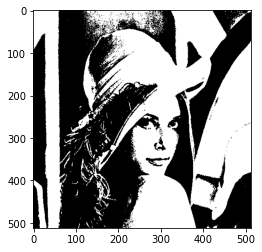

In [3]:
s = img.shape
bn = np.zeros(img.shape)
for i in range(s[2]):
    for j in range(s[0]):
        for k in range(s[1]):
            if img[j,k,i]>127:
                bn[j,k,i] = 255
            else:
                bn[j,k,i] = 0
plt.imshow(bn.astype('uint8'))
plt.show()

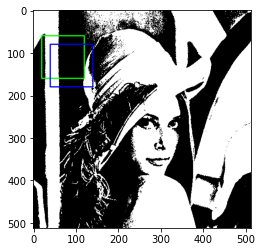

In [14]:
cv2.rectangle(bn, (20, 60), (120, 160), (0, 255, 0), 2)
cv2.rectangle(bn, (40, 80), (140, 180), (0, 0, 255), 2)
#cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
plt.imshow(bn.astype('uint8'))
plt.show()

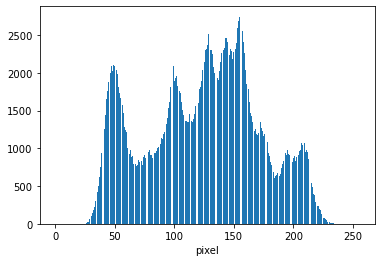

In [4]:
arr = np.zeros(256,dtype=int)
x_axes = np.arange(256)
for i in range(s[0]):
    for j in range(s[1]):
        arr[img[i,j,0]] += 1
plt.bar(x_axes,arr) #plt.hist
plt.xlabel('pixel')
plt.show()

In [5]:
type(arr[0])

numpy.int32

In [5]:
label = np.zeros((512,512),dtype=int)
for i in range(s[0]):
    for j in range(s[1]):
        if bn[i,j,0] != 0:
            label[i,j] = 1
#print(label[:,1])
#print(bn[:,1,0])
#print(label[:,0])

In [6]:
#union and find
table = [i+1 for i in range(512*512)]


In [6]:
#pass 1
count = 1
equtable = dict()
for i in range(s[0]):
    for j in range(s[1]):
        if label[i,j] == 0:
            continue
        else: #label is non zero
            if i-1 < 0: #upper bound
                if j-1<0:
                    label[i,j] = count
                    count += 1 
                else:
                    if label[i,j-1] == 0:
                        label[i,j] = count
                        count += 1
                    else:
                        label[i,j] = label[i,j-1] 
            elif j-1 < 0: #left bound
                if label[i-1,j] == 0:
                    label[i,j] = count
                    count += 1
                else:
                    label[i,j] = label[i-1,j]
            else:
                if label[i-1,j] == 0 and label[i,j-1] == 0:
                    label[i,j] = count
                    count += 1
                elif label[i-1,j] == 0:
                    label[i,j] = label[i,j-1]
                elif label[i,j-1] == 0:
                    label[i,j] = label[i-1,j]
                else:
                    M = max(label[i-1,j],label[i,j-1])
                    m = min(label[i-1,j],label[i,j-1])
                    label[i,j] = m
                    if M in equtable:
                        equtable[M] = min(equtable[M],m)
                    else:
                        equtable[M] = m
                    #if label[i-1,j] != label[i,j-1]:
                    #    equtable[max(label[i-1,j],label[i,j-1])] = min(label[i-1,j],label[i,j-1])
                    #table[max(label[i-1,j],label[i,j-1])-1] = min(label[i-1,j],label[i,j-1])
#print(equtable)

In [7]:
#pass 2
for i in range(s[0]):
    for j in range(s[1]):
        if label[i,j] == 0:
            continue
        else:
            if label[i,j] not in equtable:
                continue
            else:
                tmp = label[i,j]
                while equtable[tmp] in equtable and tmp != equtable[tmp]:
                    tmp = equtable[tmp]
                label[i,j] = tmp
            

In [8]:
for i in range(s[0]):
    for j in range(s[1]):
        if np.count_nonzero(label==label[i,j]) < 500:
            label[i,j] = 0

In [9]:
print(np.unique(label))

[   0    1    4  730  841 1600 2054 2350]


In [11]:
print(np.unique(label))

[   0    1    4  730  841 1600 2054 2350]


In [ ]:
rect = []
cent = [] #sum of i, sum of j, number of point
for k in np.unique(label):
    if k == 0:
        continue
    else:
        t = []
        u,d,l,r = 512,0,512,0
        numi,numj = 0,0
        c = 0
        for i in range(s[0]):
            for j in range(s[1]):
                if label[i,j] != t:
                    continue
                else:
                    u = min(i,u)
                    d = max(i,d)
                    l = min(j,l)
                    r = max(j,r)
                    numi += i 
                    numj += j
                    c += 1
    rect.append([u,d,l,r])
    cent.append([numi,numj,c])


In [ ]:
for i in range(len(rect)):
    cv2.rectangle(bn, (rect[i,0], rect[i,2]), (rect[i,1], rect[i,3]), (0, 255, 0), 2)
    #cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
    cv2.circle(bn,(cent[i,0]//cent[i,2], cent[j,0]//cent[i,2]), (0, 0, 255), 2)
plt.imshow(bn.astype('uint8'))
plt.show()
    